# BMW Sales Dataset (2010-2024) analysis with Pandas
We have a dataset of BMW sales for 14 years (50 000 rows), in this notebook I will represent huge and deep analysis. First of all we will prepare the data and the tools.

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sales = pd.read_csv('BMW sales data (2010-2024).csv')
sales.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [40]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


---
The dataset has no empty cells and has right dtypes, so we can start the analysis without data cleaning and trasforming.  
I will show following reports:  
1. Annual Sales Performance
2. Top Performing Models
3. Engine & Fuel Type Trend
4. Transimission Preference Report
5. Average Selling Preice (ASP) Trend
6. Milleage vs Price Correlation
7. Depreciation Analysis by Model
8. Price vs Year
9. Price vs Engine size
10. Average price trend per year
11. Price Segmentation
---
## Annual Sales Performance
How have total sales (volume and revenue) changed year over year?  
Is the company growing and what is the trend?

In [80]:
sales.head()
annual_volume = sales.groupby('Year').Price_USD.sum().reset_index()
annual_volume = annual_volume.rename(columns={'Price_USD': 'Million_USD'})
annual_volume['Million_USD'] = round(annual_volume['Million_USD'] / 1_000_000,2)
annual_volume

,Year,Million_USD
0,2010,249.99
1,2011,246.81
2,2012,249.97
3,2013,247.91
4,2014,249.76
5,2015,248.66
6,2016,254.20
7,2017,247.32
8,2018,247.34
9,2019,255.06


<Axes: xlabel='Year', ylabel='Million USD'>

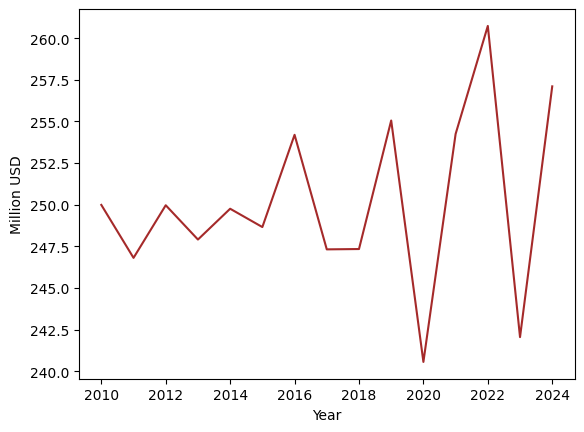

In [88]:
annual_volume.plot(
    x='Year', 
   # ylim=(220, 270), 
    color='brown',
    ylabel='Million USD',
    legend=False
)

### Conclusion
We see a **slowly growing trend**, but some years have bad results.  
**2020** and **2023** have almost 10 million less each.  
In **2020** we can associate the falling of revenue with *Covid*.  

---
## Top Performing Models
Which models are the best-sellers and generating the highest revenue for entire period.

In [113]:
bestsellers = sales.groupby('Model').agg({
    'Sales_Volume': 'count',
    'Price_USD': 'sum',
}).rename(columns={'Price_USD': 'Revenue'})
bestsellers.sort_values('Sales_Volume', ascending=False).reset_index()

,Model,Sales_Volume,Revenue
0,7 Series,4666,352610538
1,i3,4618,345427638
2,i8,4606,347137044
3,3 Series,4595,347226845
4,5 Series,4592,345721780
5,X1,4570,343948341
6,X3,4497,337349726
7,X5,4487,335215320
8,M5,4478,333498741
9,X6,4478,333318141


<Axes: xlabel='Model', ylabel='Sales Volume'>

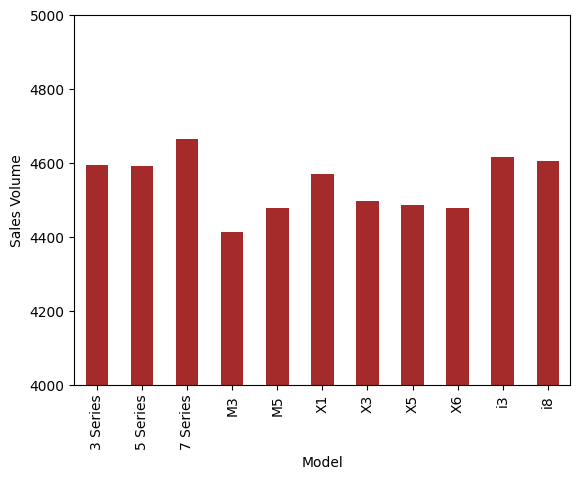

In [114]:
bestsellers.reset_index().plot.bar(
    x='Model', 
    y='Sales_Volume',
    ylim=(4000, 5000), 
    color='brown',
    ylabel='Sales Volume',
    legend=False
)

### Conclusion
The best seller is BMW 7 Series, and the least sold model is BMW M3.  
But otherwise the difference is only 200 cars.

---
## Engine & Fuel Type Trend
How has customer preference shifted between fuel types and engine sizes over the years.

<Axes: xlabel='Year', ylabel='Average engine size (L)'>

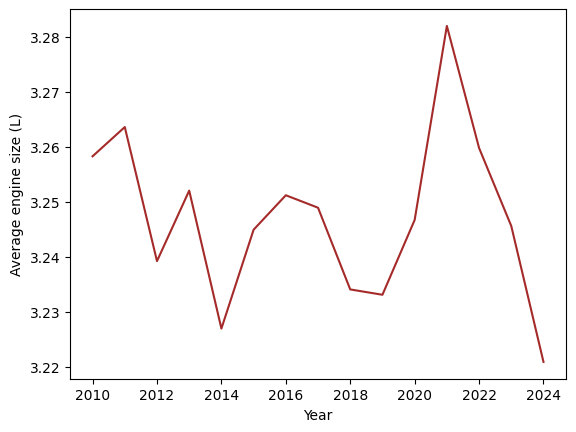

In [121]:
sales.groupby('Year').Engine_Size_L.mean().plot(
    color='brown',
    ylabel='Average engine size (L)'
)

In [130]:
fuel_trend = pd.crosstab(
    index=sales['Year'],
    columns=sales['Fuel_Type']
)
fuel_trend['Total'] = fuel_trend.sum(axis=1)
fuel_trend

Fuel_Type,Diesel,Electric,Hybrid,Petrol,Total
Year,,,,,
2010,829,837,826,838,3330
2011,791,841,837,809,3278
2012,791,825,880,836,3332
2013,815,821,843,847,3326
2014,867,810,868,805,3350
2015,803,826,869,860,3358
2016,842,849,814,860,3365
2017,801,822,822,845,3290
2018,801,859,803,815,3278


<Axes: xlabel='Year', ylabel='Cars sold'>

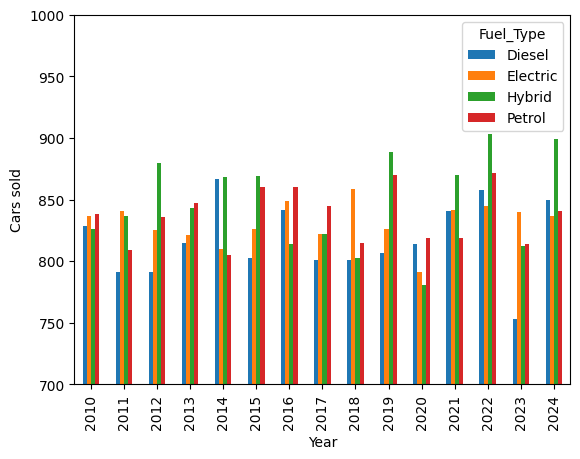

In [136]:
fuel_trend.plot.bar(
    y=['Diesel', 'Electric', 'Hybrid', 'Petrol'],
    ylim=(700, 1000),
    ylabel='Cars sold'
)

### Conclusion
We can see that people like cars with *big engine*, so all the time the average engine size is more than **3.0 l**.  
And also we see that in the last years the most popular fuel type is **Hybrid**.

---

# Will be continued soon ! :)